In [25]:

from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import shuffle

%matplotlib inline

import logging as LG

LG.basicConfig( #level=LG.DEBUG, # changes for all imports as well
               format="%(levelname).1s: %(message)s") # changing here requires restart notebook

lg = LG.getLogger("python-ajupyter")
print(lg.getEffectiveLevel())
lg.setLevel(LG.DEBUG)

# lg.debug('This is a debug message')
# lg.info('This is an info message')
# lg.warning('This is a warning message')
# lg.error('This is an error message')
# lg.critical('This is a critical message')
N=100_000
Default_val = 100

50


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [3]:
def setup(quant: int, val: int) -> np.array:
    return np.full(quant, val)

In [4]:
def simple_returns(quant=None, retmax=10, ret=None, whole=True) -> np.array:
    """half makes profit of ret and half loses ret (percentage)
    :ret float to indicate max profit, so >= 0"""
    if ret is None:
        if whole:
            ret = np.random.randint(0,retmax)
        else:
            ret = np.random.uniform(0,retmax)
    lg.debug("ret: " + str(ret) +" %")
    return np.concatenate((np.full(quant//2, 1+(ret/100)), np.full(quant//2, 1-(ret/100))))


In [46]:
@interact(ret=widgets.IntText(continuous_update=False, value=-101), iterations=widgets.IntText(), steps=(1,100,5))
def simulateSimple( shuffleOn=True, iterations=10,graph=False, 
                   cumulative=False,retmax=10, ret=-101, whole=True, steps=1, days_legend=True):
    original = iterations
    
    init = setup(N, Default_val)
    
    result = [init]
    while iterations > 0:
        lg.debug(f"iteration {original - iterations +1}")
        iterations -= 1
        
        simpleret = simple_returns(len(init),retmax, ret if ret != -101 else None, whole)
        if shuffleOn:
            shuffle(simpleret)
        comb = np.multiply(init, simpleret)
        lg.debug("after multiplying: " + str(comb))
        result.append(comb)
        init = comb
        
    draw_graph(result, cumulative=cumulative, steps=steps, days_legend=days_legend)
    return result

interactive(children=(Checkbox(value=True, description='shuffleOn'), IntText(value=0, description='iterations'…

D: presort [2, 4, 6, 8]


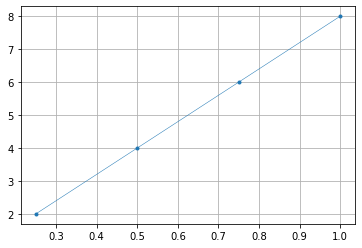

In [44]:
def draw_graph(data: np.array(np.array), cumulative=False, 
               log=False, fmt=".-", grid=True, days_legend=True, steps=1):
    
    fig, ax = plt.subplots()
    
    for year, i in list(enumerate(data, 1))[::steps]:
        lg.debug("presort " + str(i))
        i.sort()
        if cumulative:
            og=i
            cumulated = np.cumsum(i)
            i = np.divide(cumulated, cumulated[-1])
            lg.debug(f"postsort (cumulated={cumulative} (og {og} \ncumulated{cumulated}\ni {i} -- {cumulated[-1]})) ")
        
        ax.grid(True) if grid else plt.grid(False)
        plot_in =([x/len(i) for x in range(1,len(i)+1)],i, fmt)#, label:f"year {year}"}
#         print(plot_in)
        if log:
            ax.loglog(*plot_in)
        else:
            ax.plot(*plot_in, linewidth=0.5)
    fig.savefig("test.png")
#     return fig


draw_graph([[2,4,6,8]], cumulative=False)

# draw_graph([[2,4,6,8]], cumulative=False),draw_graph([[2,2,2,2]], cumulative=True), #draw_graph([[4,5,6]])

# x, y = (draw_graph([[2,4,6,8]], cumulative=False),draw_graph([[2,2,2,2]], cumulative=True))

D: iteration 1
D: ret: 3 %
D: after multiplying: [103.  97.  97. ... 103.  97. 103.]
D: iteration 2
D: ret: 5 %
D: after multiplying: [108.15  92.15 101.85 ...  97.85  92.15  97.85]
D: iteration 3
D: ret: 5 %
D: after multiplying: [113.5575  87.5425 106.9425 ... 102.7425  87.5425  92.9575]
D: iteration 4
D: ret: 7 %
D: after multiplying: [105.608475  81.414525  99.456525 ... 109.934475  93.670475  86.450475]
D: iteration 5
D: ret: 5 %
D: after multiplying: [110.88889875  85.48525125  94.48369875 ... 115.43119875  88.98695125
  90.77299875]
D: iteration 6
D: ret: 8 %
D: after multiplying: [119.76001065  92.32407135 102.04239465 ... 106.19670285  96.10590735
  83.51115885]
D: iteration 7
D: ret: 2 %
D: after multiplying: [117.36481044  90.47758992 100.00154676 ... 104.07276879  94.1837892
  81.84093567]
D: iteration 8
D: ret: 5 %
D: after multiplying: [111.49656992  85.95371043  95.00146942 ...  98.86913035  98.89297866
  77.74888889]
D: iteration 9
D: ret: 8 %
D: after multiplying: [102

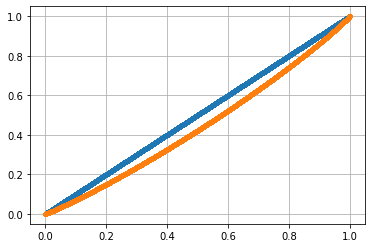

In [7]:
a = simulateSimple(iterations=20,graph=True, cumulative=True, steps=11)

In [10]:
@interact(x={"1-4":[1,2,3,4], "5-8":[5,6,7,8]}, y=[[10,20,30,40]], z=widgets.Text(continuous_update=False))
def lala(x, y,z=""):
    if z is not "":
        x = np.fromstring(z, dtype=np.float, sep=' ')
    plt.plot(x,y)

interactive(children=(Dropdown(description='x', options={'1-4': [1, 2, 3, 4], '5-8': [5, 6, 7, 8]}, value=[1, …

In [20]:
lg.setLevel(LG.CRITICAL)